# Exploration

In this notebook, we will go through the data exploration to make ourselves more familiar with the data. We will use visualization tools to extract some pattern/relationships from data.

In [29]:
import pandas as pd

data = pd.read_csv("processed_data.csv")
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [30]:
import matplotlib.pyplot as plt

## Gender

In [31]:
data['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

<Axes: xlabel='Gender', ylabel='Count'>

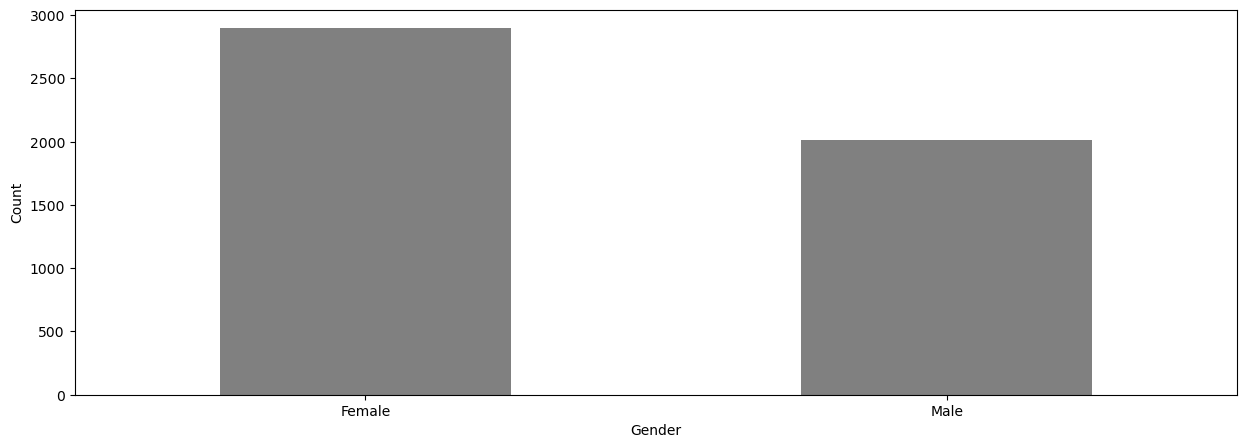

In [32]:
data['gender'].value_counts().plot(kind='bar', xlabel='Gender', ylabel='Count', rot=0, figsize=(15, 5), color="grey")

In [5]:
freq_table = pd.crosstab(data['gender'], data['stroke'], normalize="index")
print(freq_table)

stroke         0         1
gender                    
Female  0.958578  0.041422
Male    0.955743  0.044257


## Age

Text(0, 0.5, 'Frequency')

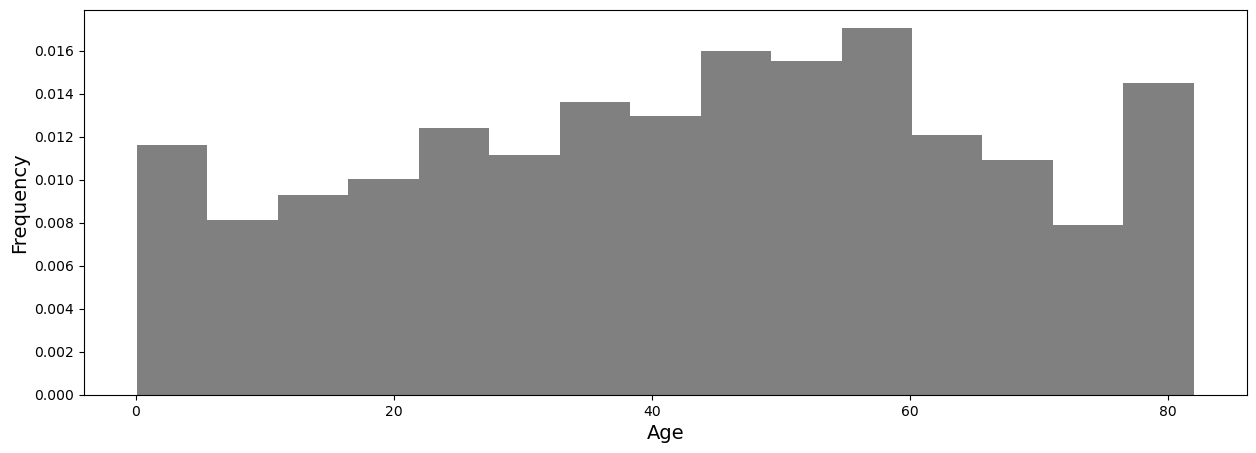

In [13]:
plt.figure(figsize=(15,5))
plt.hist(data["age"], bins=15, color="grey", density=True)
plt.xlabel('Age', fontsize=14)
plt.ylabel("Frequency", fontsize=14)

As we can see, the age distribution is as follows:

* There are many datapoints in the tails of the distribution. 
* The distribution is likely to have a normal shape.
* The distribution is right-skewed.

Text(0, 0.5, 'Frequency')

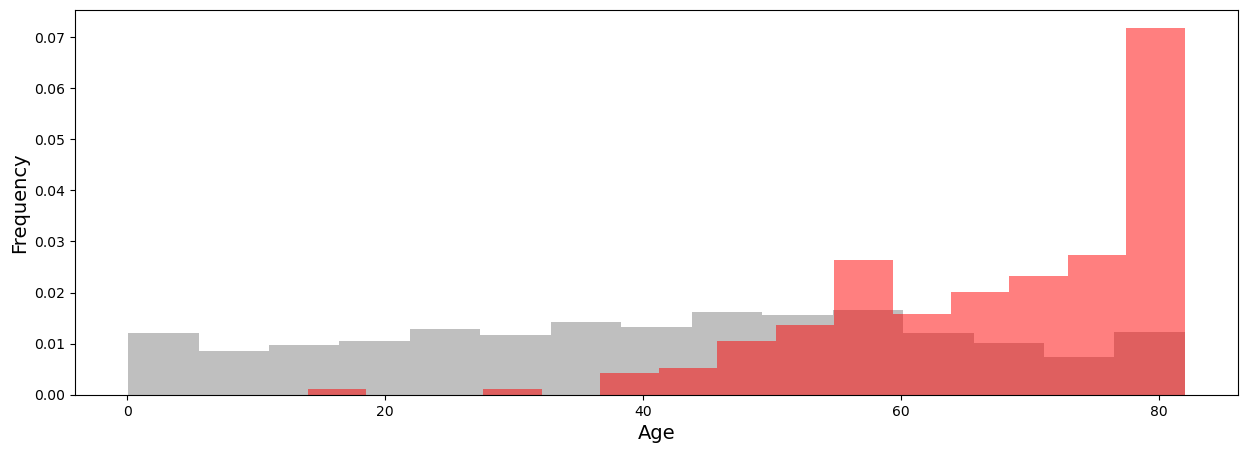

In [14]:
plt.figure(figsize=(15,5))
plt.hist(data[data["stroke"]==0]["age"], bins=15, alpha=0.5, color='grey', density=True)
plt.hist(data[data["stroke"]==1]["age"], bins=15, alpha=0.5, color='r', density=True)
plt.xlabel('Age', fontsize=14)
plt.ylabel("Frequency", fontsize=14)

The histogram above indicates that older people are more likely to got stroke than younger people. So, age could be a good predictor of stroke.

## Hypertension

<Axes: xlabel='hypertension', ylabel='Count'>

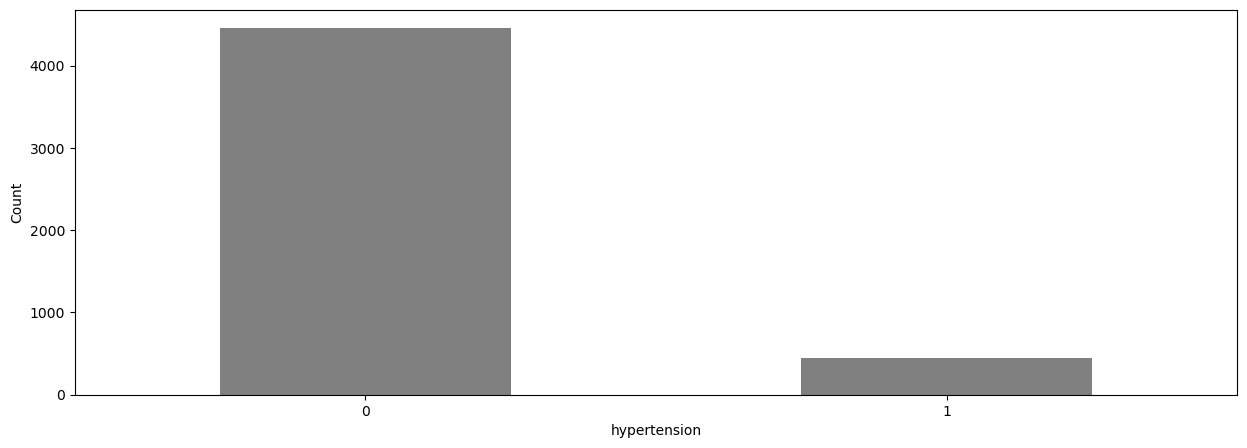

In [15]:
data['hypertension'].value_counts().plot(kind='bar', xlabel='hypertension', ylabel='Count', rot=0, figsize=(15, 5), color="grey")

In [9]:
data['hypertension'].value_counts()

0    4457
1     451
Name: hypertension, dtype: int64

As we can see, the number of individuals with hypertension is very small. Around 10% of the individuals have hypertension, and it adds some biases into our dataset. We need to be careful about this biases when we create models.

In [10]:
freq_table = pd.crosstab(data['hypertension'], data['stroke'], normalize="index")
print(freq_table)

stroke               0         1
hypertension                    
0             0.966569  0.033431
1             0.866962  0.133038


We can see the difference between stroke probability with and without the hypertension. Only **3.3%** of individuals without hypertension got stroke. Around **13.3%** of individuals with hypertension got stroke.


## Heart_disease

<Axes: xlabel='heart_disease', ylabel='Count'>

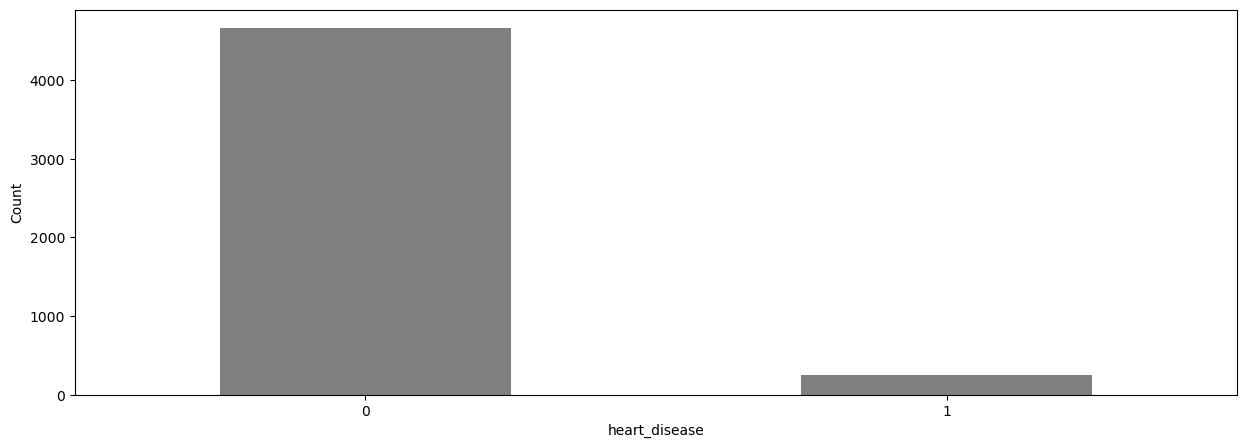

In [16]:
data['heart_disease'].value_counts().plot(kind='bar', xlabel='heart_disease', ylabel='Count', rot=0, figsize=(15, 5), color="grey")

In [12]:
data['heart_disease'].value_counts()

0    4665
1     243
Name: heart_disease, dtype: int64

Around 5% of the individuals have heart disease. It adds some biases to our data. We must be careful when we use this data in our modeling.

In [13]:
freq_table = pd.crosstab(data['heart_disease'], data['stroke'], normalize="index")
print(freq_table)

stroke                0         1
heart_disease                    
0              0.963773  0.036227
1              0.835391  0.164609


We can see the difference between stroke probability with and without the heart diseas. Only **3.6%** of individuals without heart disease got stroke. Around **16.4%** of individuals with heart disease got stroke.

## Marriage

<Axes: xlabel='ever_married', ylabel='Count'>

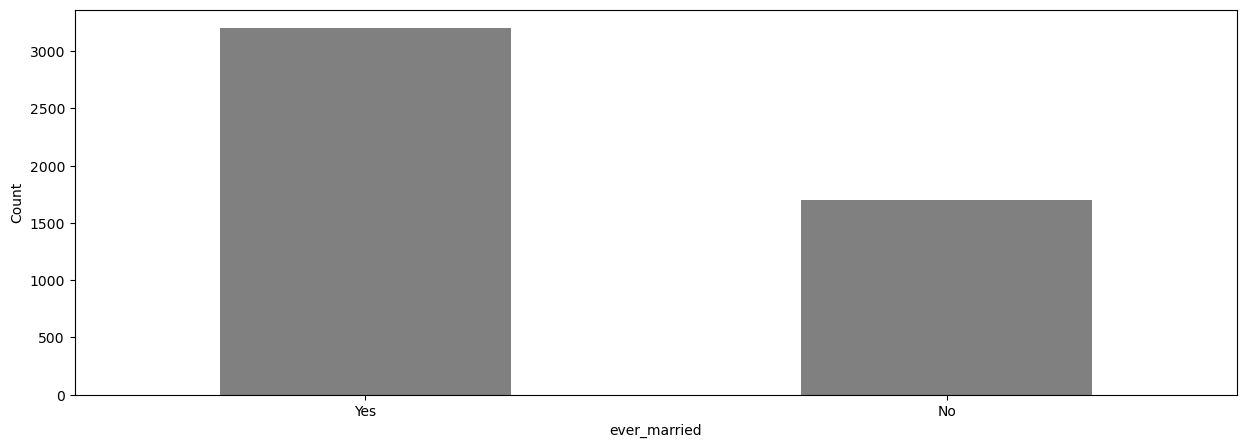

In [17]:
data['ever_married'].value_counts().plot(kind='bar', xlabel='ever_married', ylabel='Count', rot=0, figsize=(15, 5), color="grey")

In [18]:
data['ever_married'].value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

In [15]:
freq_table = pd.crosstab(data['ever_married'], data['stroke'], normalize="index")
print(freq_table)

stroke               0         1
ever_married                    
No            0.986502  0.013498
Yes           0.941948  0.058052


The marriage status can have small impact on stroke. We can see that only **1.3%** of not married individuals got stroke. On the other hand, around **5.8%** of married individuals got stroke.

## Work Type

<Axes: xlabel='work_type', ylabel='Count'>

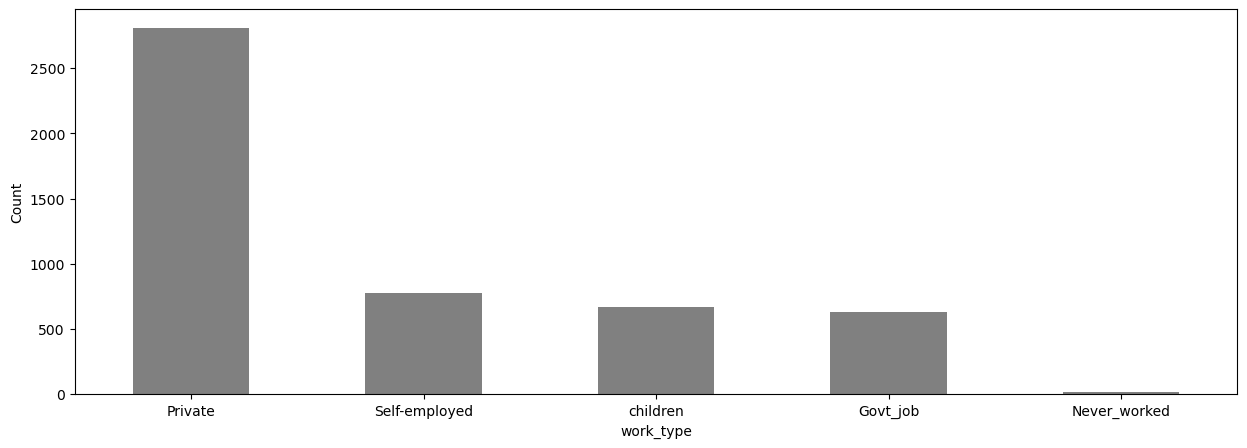

In [24]:
data['work_type'].value_counts().plot(kind='bar', xlabel='work_type', ylabel='Count', rot=0, figsize=(15, 5), color="grey")

In [17]:
freq_table = pd.crosstab(data['work_type'], data['stroke'], normalize="index")
print(freq_table)

stroke                0         1
work_type                        
Govt_job       0.955556  0.044444
Never_worked   1.000000  0.000000
Private        0.954804  0.045196
Self-employed  0.931613  0.068387
children       0.998510  0.001490


## Residence Type

<Axes: xlabel='Residence_type', ylabel='Count'>

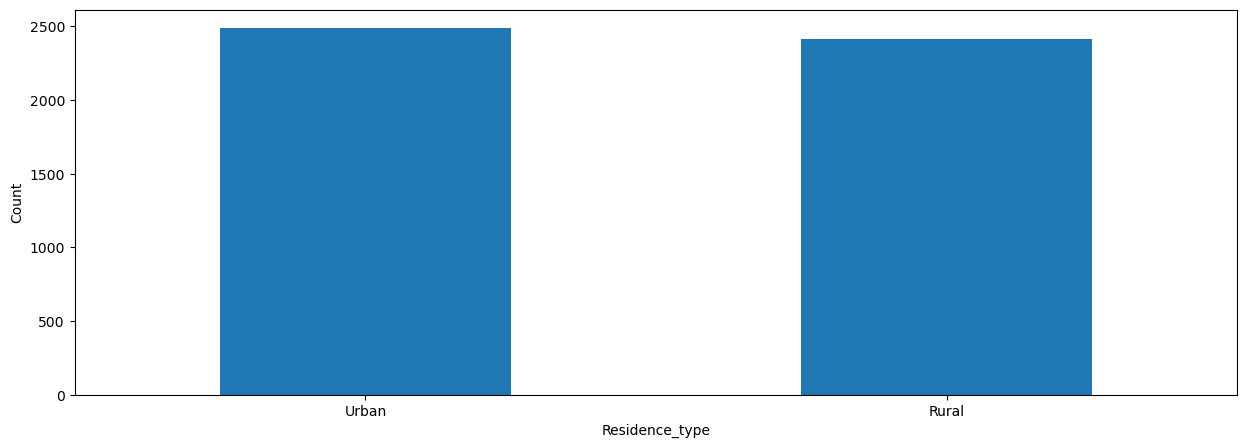

In [18]:
data['Residence_type'].value_counts().plot(kind='bar', xlabel='Residence_type', ylabel='Count', rot=0, figsize=(15, 5))

In [19]:
freq_table = pd.crosstab(data['Residence_type'], data['stroke'], normalize="index")
print(freq_table)

stroke                 0         1
Residence_type                    
Rural           0.958644  0.041356
Urban           0.956225  0.043775


## Glucose Level

(array([ 712., 1124., 1106.,  713.,  366.,  150.,  111.,   66.,   57.,
         107.,  144.,  130.,   80.,   33.,    9.]),
 array([ 55.12      ,  69.56133333,  84.00266667,  98.444     ,
        112.88533333, 127.32666667, 141.768     , 156.20933333,
        170.65066667, 185.092     , 199.53333333, 213.97466667,
        228.416     , 242.85733333, 257.29866667, 271.74      ]),
 <BarContainer object of 15 artists>)

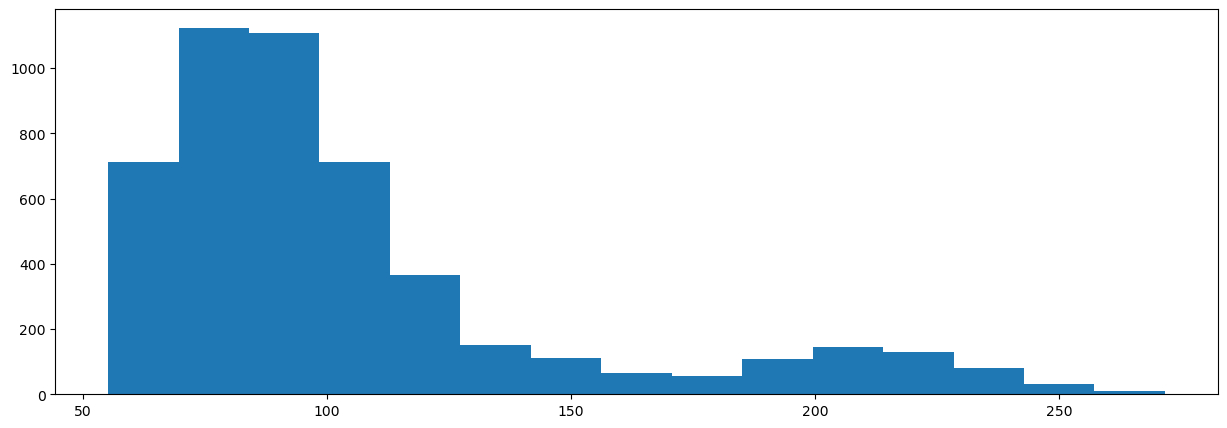

In [20]:
plt.figure(figsize=(15,5))
plt.hist(data["avg_glucose_level"], bins=15)

(array([0.00765532, 0.01264793, 0.01031805, 0.00765532, 0.00266272,
        0.00232988, 0.00099852, 0.00099852, 0.00266272, 0.00532544,
        0.00532544, 0.00465976, 0.00366124, 0.0016642 , 0.00099852]),
 array([ 56.11      ,  70.48533333,  84.86066667,  99.236     ,
        113.61133333, 127.98666667, 142.362     , 156.73733333,
        171.11266667, 185.488     , 199.86333333, 214.23866667,
        228.614     , 242.98933333, 257.36466667, 271.74      ]),
 <BarContainer object of 15 artists>)

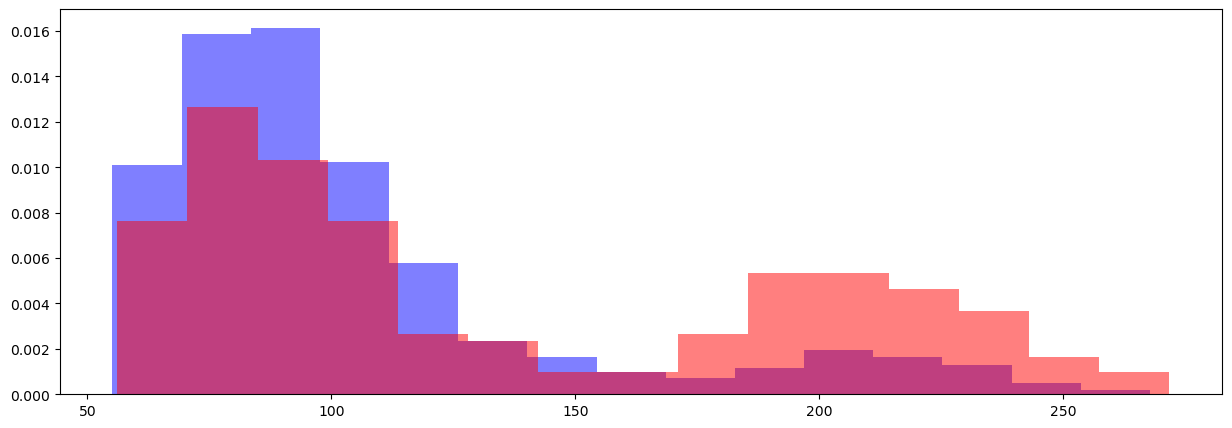

In [21]:
plt.figure(figsize=(15,5))
plt.hist(data[data["stroke"]==0]["avg_glucose_level"], bins=15, alpha=0.5, color='b', density=True)
plt.hist(data[data["stroke"]==1]["avg_glucose_level"], bins=15, alpha=0.5, color='r', density=True)

## BMI

(array([1.000e+02, 7.740e+02, 1.500e+03, 1.395e+03, 6.800e+02, 3.090e+02,
        8.600e+01, 4.300e+01, 1.300e+01, 4.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00]),
 array([10.3 , 16.12, 21.94, 27.76, 33.58, 39.4 , 45.22, 51.04, 56.86,
        62.68, 68.5 , 74.32, 80.14, 85.96, 91.78, 97.6 ]),
 <BarContainer object of 15 artists>)

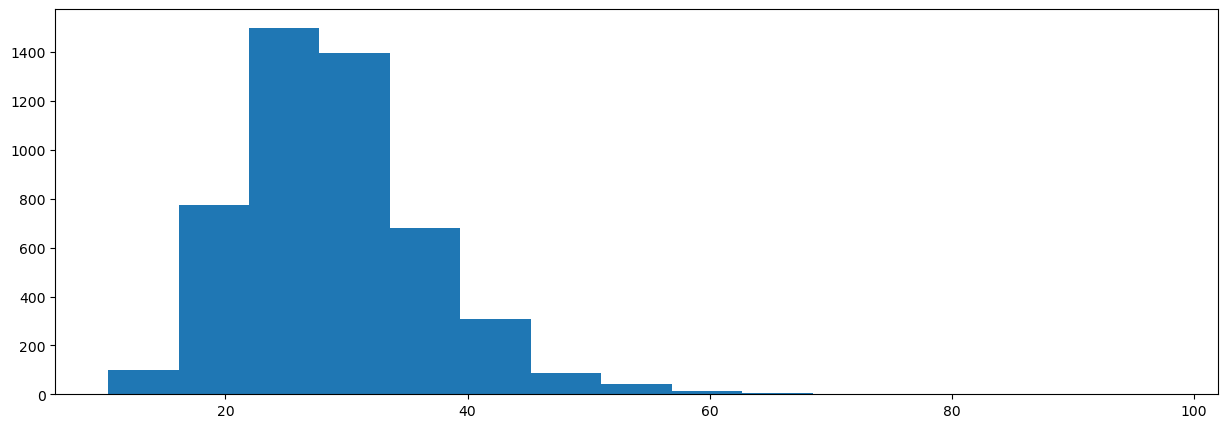

In [22]:
plt.figure(figsize=(15,5))
plt.hist(data["bmi"], bins=15)

(array([0.00361563, 0.01807817, 0.04338761, 0.06688923, 0.07231268,
        0.06508141, 0.03434852, 0.03254071, 0.01446254, 0.00903909,
        0.01265472, 0.00180782, 0.00180782, 0.        , 0.00180782]),
 array([16.9       , 19.54666667, 22.19333333, 24.84      , 27.48666667,
        30.13333333, 32.78      , 35.42666667, 38.07333333, 40.72      ,
        43.36666667, 46.01333333, 48.66      , 51.30666667, 53.95333333,
        56.6       ]),
 <BarContainer object of 15 artists>)

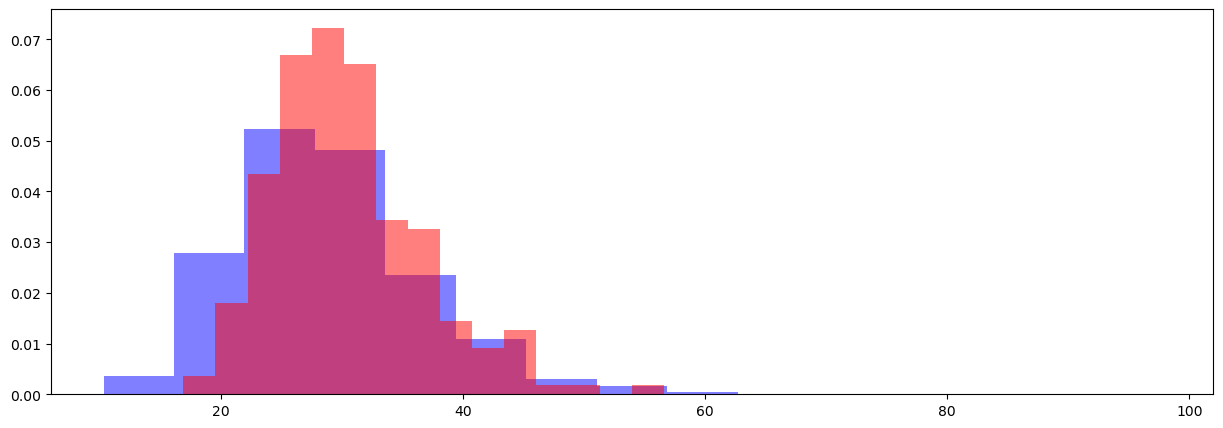

In [23]:
plt.figure(figsize=(15,5))
plt.hist(data[data["stroke"]==0]["bmi"], bins=15, alpha=0.5, color='b', density=True)
plt.hist(data[data["stroke"]==1]["bmi"], bins=15, alpha=0.5, color='r', density=True)

## Smoking Status

<Axes: xlabel='smoking_status', ylabel='Count'>

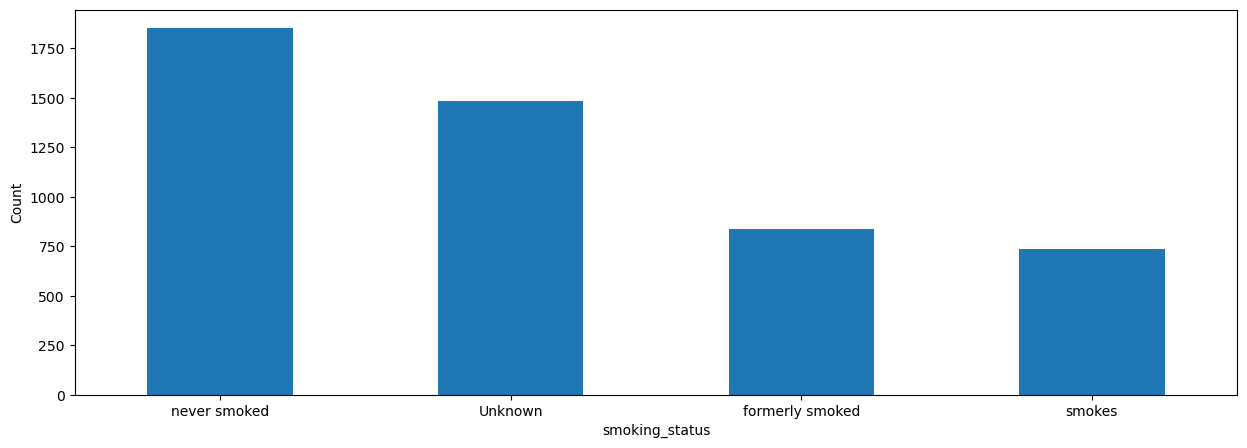

In [24]:
data['smoking_status'].value_counts().plot(kind='bar', xlabel='smoking_status', ylabel='Count', rot=0, figsize=(15, 5))

In [25]:
freq_table = pd.crosstab(data['smoking_status'], data['stroke'], normalize="index")
print(freq_table)

stroke                  0         1
smoking_status                     
Unknown          0.980445  0.019555
formerly smoked  0.931818  0.068182
never smoked     0.954644  0.045356
smokes           0.947083  0.052917


## Data Distribution for categorical data

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

### (Gender) ---- (Residence_type)

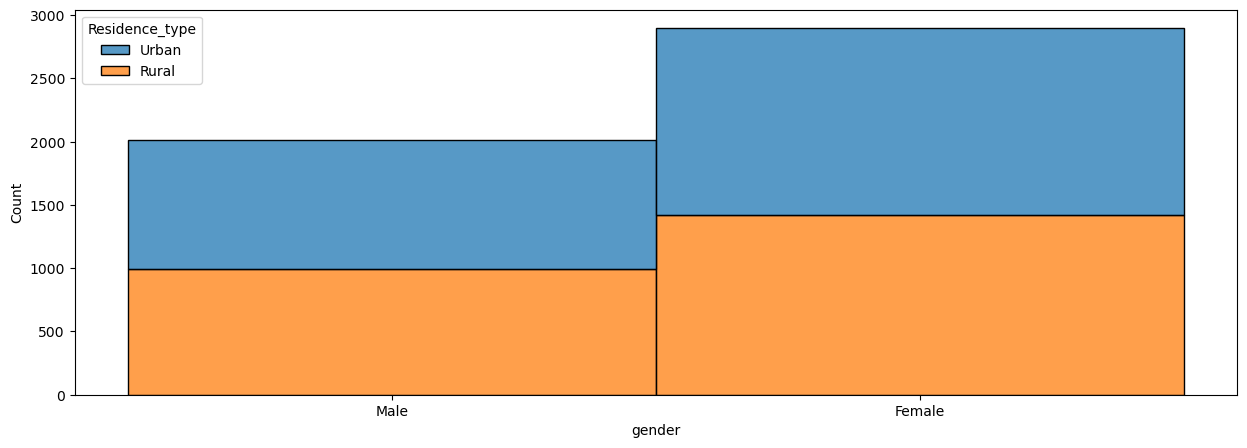

In [27]:
plt.figure(figsize=(15,5))
ax = sns.histplot(x="gender", hue="Residence_type", data=data, stat="count", multiple="stack")

### (Gender) ---- (Hypertension)

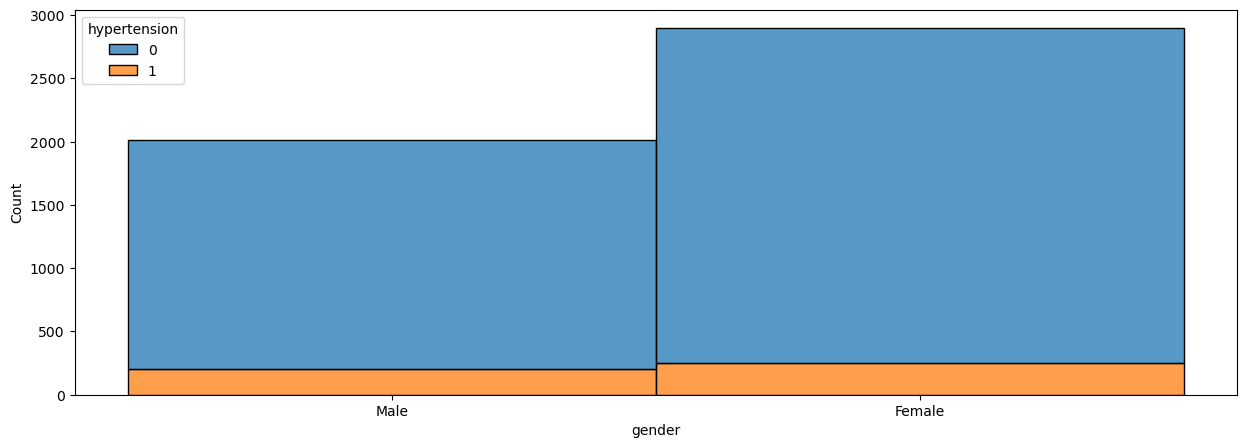

In [28]:
plt.figure(figsize=(15,5))
ax = sns.histplot(x="gender", hue="hypertension", data=data, stat="count", multiple="stack")

### (Gender) ---- (Heart_disease)

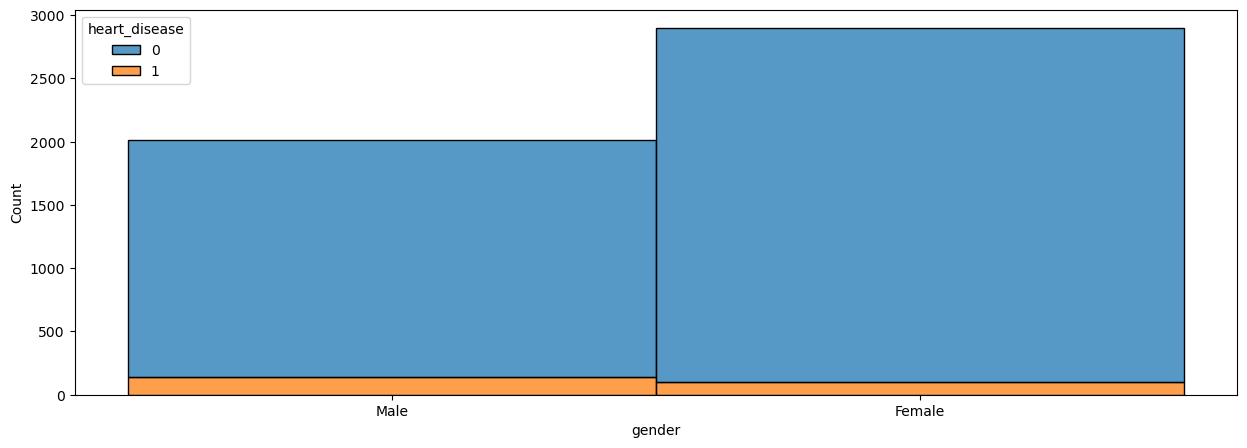

In [29]:
plt.figure(figsize=(15,5))
ax = sns.histplot(x="gender", hue="heart_disease", data=data, stat="count", multiple="stack")

### (Gender) ---- (Work_type)

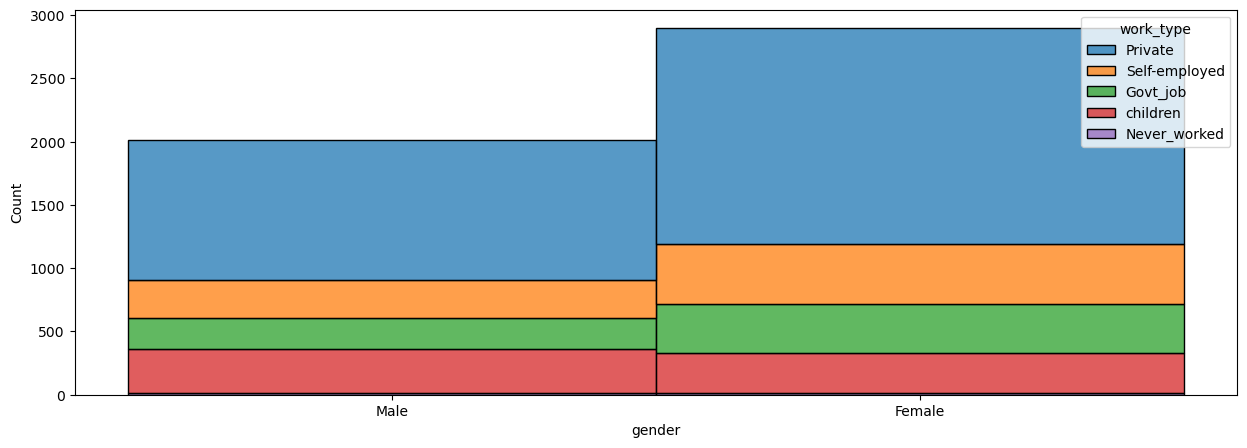

In [30]:
plt.figure(figsize=(15,5))
ax = sns.histplot(x="gender", hue="work_type", data=data, stat="count", multiple="stack")

## Effect of smoking and heart disease on stroke

In [31]:
pivot_table = pd.pivot_table(data, 
                             values='stroke', 
                             index='smoking_status', 
                             columns='heart_disease', 
                             aggfunc=lambda x: (sum(x)/len(x))*100)
print(pivot_table)

heart_disease           0          1
smoking_status                      
Unknown          1.728907  10.810811
formerly smoked  5.874674  17.142857
never smoked     4.121965  13.580247
smokes           3.812317  23.636364


As we can see, if the person smokes and also has heart disease, the chance of stroke would be very higher than other situation.

## Effect of smoking and hypertension on stroke

In [32]:
pivot_table = pd.pivot_table(data, 
                             values='stroke', 
                             index='smoking_status', 
                             columns='hypertension', 
                             aggfunc=lambda x: (sum(x)/len(x))*100)
print(pivot_table)

hypertension            0          1
smoking_status                      
Unknown          1.805556   6.976744
formerly smoked  5.509642  15.454545
never smoked     3.300733  13.888889
smokes           4.427481  12.195122


## Effect of heart disease and hypertension on stroke

In [33]:
pivot_table = pd.pivot_table(data, 
                             values='stroke', 
                             index='heart_disease', 
                             columns='hypertension', 
                             aggfunc=lambda x: (sum(x)/len(x))*100)
print(pivot_table)

hypertension           0          1
heart_disease                      
0               2.808989  12.468193
1              15.675676  18.965517


## Effect of residence type and heart disease on stroke

In [34]:
pivot_table = pd.pivot_table(data, 
                             values='stroke', 
                             index='Residence_type', 
                             columns='heart_disease', 
                             aggfunc=lambda x: (sum(x)/len(x))*100)
print(pivot_table)

heart_disease          0          1
Residence_type                     
Rural           3.526339  15.702479
Urban           3.716216  17.213115


## Effect of residence type and hypertension on stroke

In [35]:
pivot_table = pd.pivot_table(data, 
                             values='stroke', 
                             index='Residence_type', 
                             columns='hypertension', 
                             aggfunc=lambda x: (sum(x)/len(x))*100)
print(pivot_table)

hypertension           0          1
Residence_type                     
Rural           3.234624  13.004484
Urban           3.448276  13.596491


## Effect of hypertension and bmi on stroke

<Axes: xlabel='bmi', ylabel='hypertension'>

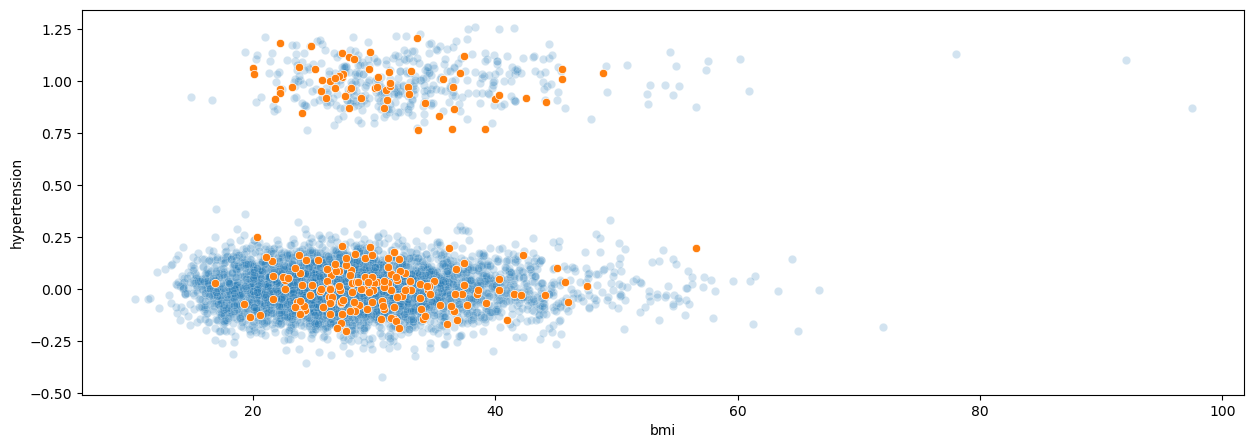

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

plt.figure(figsize=(15,5))
ax = sns.scatterplot(
    x = jitter(data[data['stroke']==0].bmi,0),
    y = jitter(data[data['stroke']==0].hypertension,0),
    alpha=0.2,
)

sns.scatterplot(
    x = jitter(data[data['stroke']==1].bmi,0),
    y = jitter(data[data['stroke']==1].hypertension,0),
    alpha=1,
    ax=ax
)



## Effect of hear disease and bmi on stroke

<Axes: xlabel='bmi', ylabel='heart_disease'>

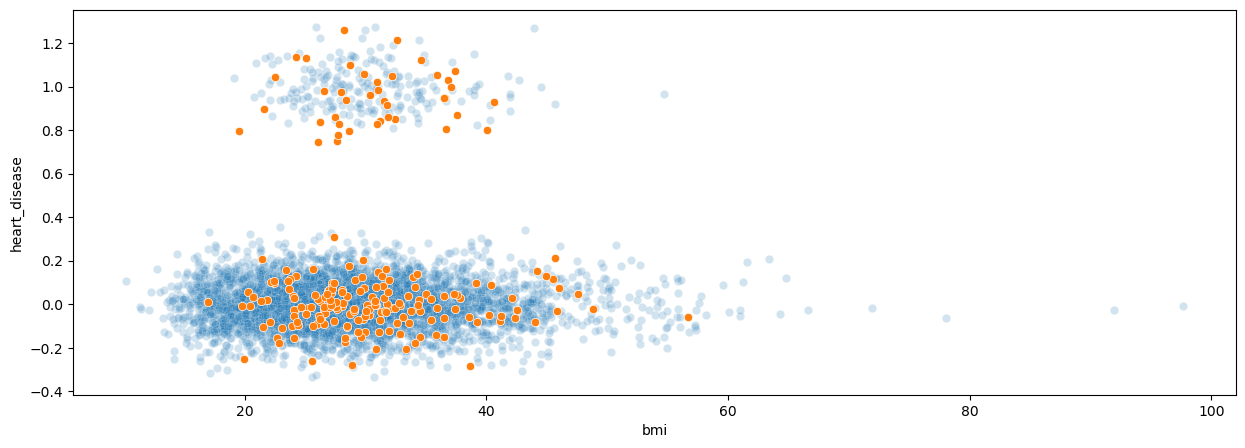

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

plt.figure(figsize=(15,5))
ax = sns.scatterplot(
    x = jitter(data[data['stroke']==0].bmi,0),
    y = jitter(data[data['stroke']==0].heart_disease,0),
    alpha=0.2,
)

sns.scatterplot(
    x = jitter(data[data['stroke']==1].bmi,0),
    y = jitter(data[data['stroke']==1].heart_disease,0),
    alpha=1,
    ax=ax
)


## Effect of average glucose level and heart disease on stroke

<Axes: xlabel='avg_glucose_level', ylabel='heart_disease'>

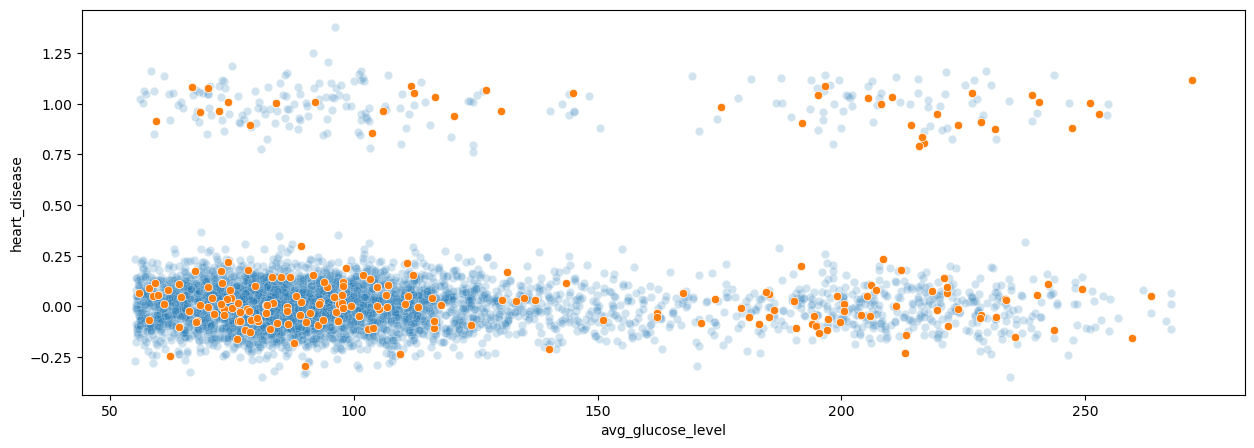

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

plt.figure(figsize=(15,5))
ax = sns.scatterplot(
    x = jitter(data[data['stroke']==0].avg_glucose_level,0),
    y = jitter(data[data['stroke']==0].heart_disease,0),
    alpha=0.2,
)

sns.scatterplot(
    x = jitter(data[data['stroke']==1].avg_glucose_level,0),
    y = jitter(data[data['stroke']==1].heart_disease,0),
    alpha=1,
    ax=ax
)


## Effect of average glucose level and hypertension on stroke

<Axes: xlabel='avg_glucose_level', ylabel='hypertension'>

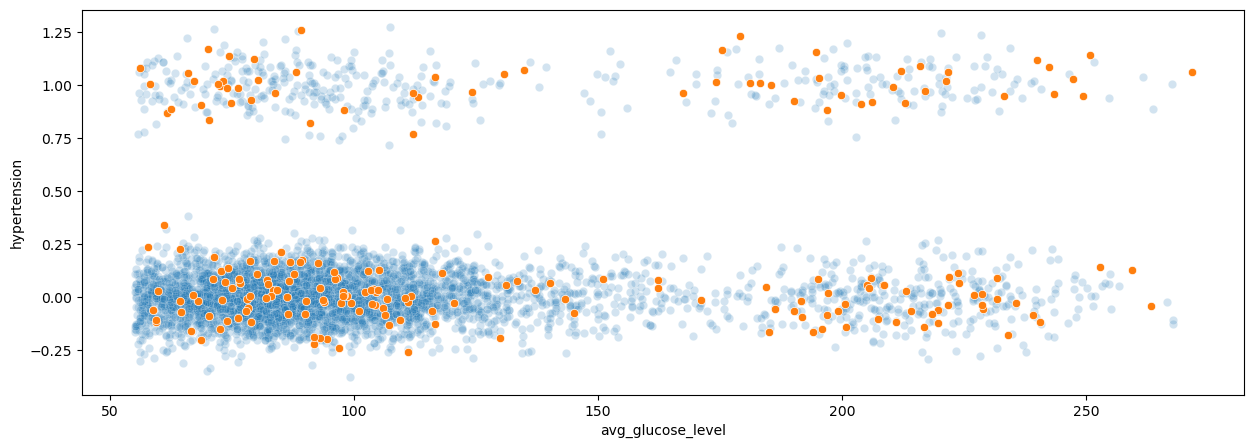

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

plt.figure(figsize=(15,5))
ax = sns.scatterplot(
    x = jitter(data[data['stroke']==0].avg_glucose_level,0),
    y = jitter(data[data['stroke']==0].hypertension,0),
    alpha=0.2,
)

sns.scatterplot(
    x = jitter(data[data['stroke']==1].avg_glucose_level,0),
    y = jitter(data[data['stroke']==1].hypertension,0),
    alpha=1,
    ax=ax
)

## Effect of mariage and age on stroke

([<matplotlib.axis.YTick at 0x2bc650395d0>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

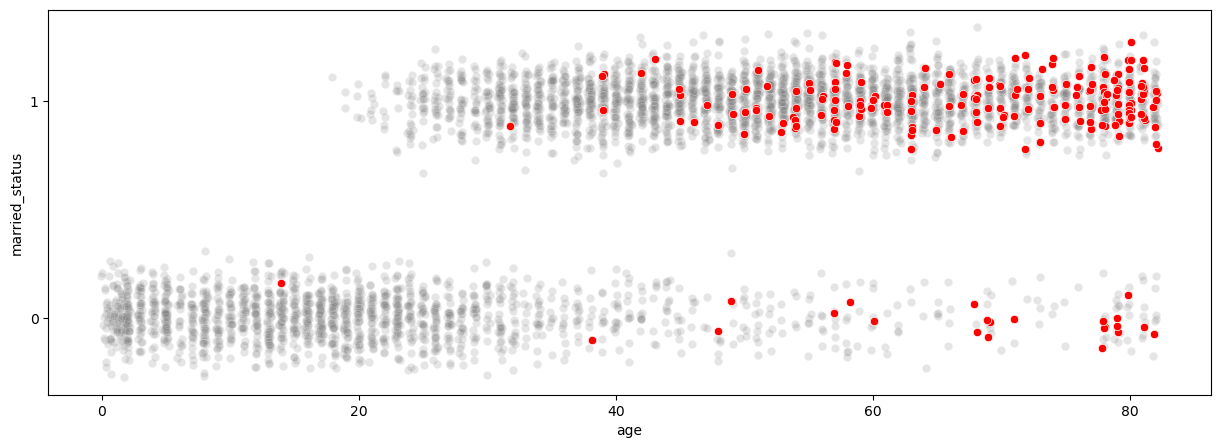

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

data["married_status"] = data.apply(lambda x: 1 if x["ever_married"] == "Yes" else 0, axis=1)

plt.figure(figsize=(15,5))
ax = sns.scatterplot(
    x = jitter(data[data['stroke']==0].age,0),
    y = jitter(data[data['stroke']==0].married_status,0),
    alpha=0.2,
    color="grey"
)

sns.scatterplot(
    x = jitter(data[data['stroke']==1].age,0),
    y = jitter(data[data['stroke']==1].married_status,0),
    alpha=1,
    color="red",
    ax=ax
)
plt.yticks([0, 1])

## Effect of work_type and age on stroke

([<matplotlib.axis.YTick at 0x2bc6a46f350>,
 [Text(0, 1, 'Private'),
  Text(0, 2, 'Self-employed'),
  Text(0, 3, 'Govt_job'),
  Text(0, 4, 'children'),
  Text(0, 5, 'Never_worked')])

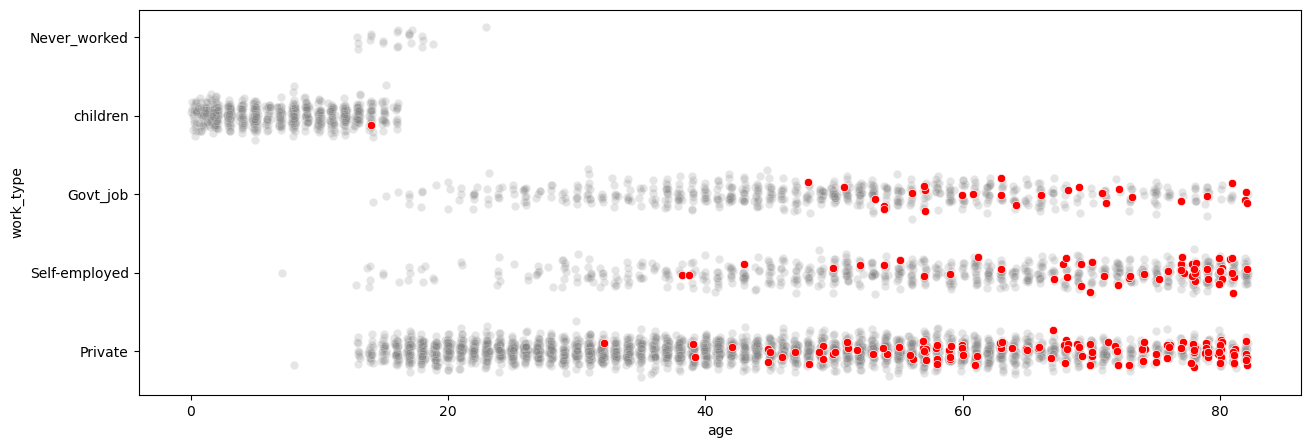

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)
data_dic = {"Private": 1, "Self-employed": 2, "Govt_job": 3, "children": 4, "Never_worked": 5}
data["work_type"] = data.apply(lambda x: data_dic[x["work_type"]], axis=1)

plt.figure(figsize=(15,5))
ax = sns.scatterplot(
    x = jitter(data[data['stroke']==0].age,0),
    y = jitter(data[data['stroke']==0].work_type,0),
    alpha=0.2,
    color="grey"
)

sns.scatterplot(
    x = jitter(data[data['stroke']==1].age,0),
    y = jitter(data[data['stroke']==1].work_type,0),
    alpha=1,
    color="red",
    ax=ax
)
plt.yticks([1, 2, 3, 4, 5], ["Private", "Self-employed", "Govt_job", "children", "Never_worked"])